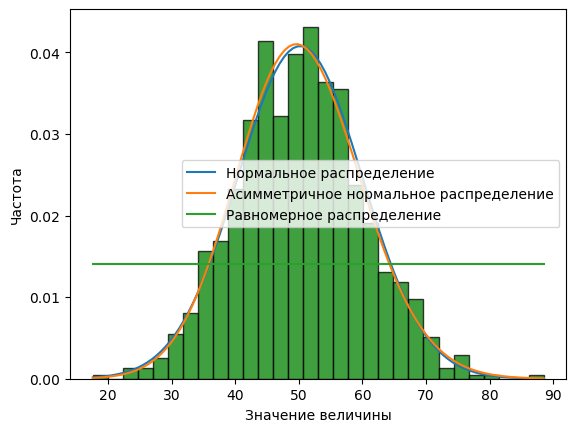

Хи-квадрат статистика (равномерное распределение): 0.45142945134560414
p-value: 1.0
Статистика Колмогорова-Смирнова (равномерное распределение): 0.2640226896409529
p-value: 5.1850815759897895e-62


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Создаем новые данные
np.random.seed(42)
samples = np.random.normal(loc=50, scale=10, size=1000)

# Гипотезы о законе распределения
# Гипотеза 1: Нормальное распределение
x = np.linspace(min(samples), max(samples), 100)
mean = np.mean(samples)
std = np.std(samples)
y_pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, y_pdf, label='Нормальное распределение')

# Гипотеза 2: Асимметричное нормальное распределение
y_skew_pdf = stats.skewnorm.pdf(x, *stats.skewnorm.fit(samples))
plt.plot(x, y_skew_pdf, label='Асимметричное нормальное распределение')

# Гипотеза 3: Равномерное распределение
y_uniform_pdf = stats.uniform.pdf(x, min(samples), max(samples) - min(samples))
plt.plot(x, y_uniform_pdf, label='Равномерное распределение')

# Построение гистограммы
n, bins, patches = plt.hist(samples, 30, density=True, facecolor='g', edgecolor='black', alpha=0.75)

plt.xlabel('Значение величины')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Проверка гипотез с помощью критерия хи-квадрат
observed_frequencies, bin_edges = np.histogram(samples, bins=30, density=True)
expected_frequencies_uniform = stats.uniform.pdf((bin_edges[1:] + bin_edges[:-1]) / 2, min(samples), max(samples) - min(samples))

chi_square_statistic_uniform, p_value_uniform = stats.chisquare(observed_frequencies, expected_frequencies_uniform)
print(f'Хи-квадрат статистика (равномерное распределение): {chi_square_statistic_uniform}')
print(f'p-value: {p_value_uniform}')

# Проверка гипотезы с помощью критерия Колмогорова-Смирнова
ks_statistic_uniform, ks_p_value_uniform = stats.kstest(samples, 'uniform', args=(min(samples), max(samples) - min(samples)))
print(f'Статистика Колмогорова-Смирнова (равномерное распределение): {ks_statistic_uniform}')
print(f'p-value: {ks_p_value_uniform}')
